In [ ]:
!pip install -U mealpy==3.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 30.8 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

from mealpy.swarm_based import PSO
from mealpy.utils.problem import Problem
from mealpy.utils.space import FloatVar, IntegerVar

In [ ]:
import pandas as pd

# EKSPLORASI AWAL DATASET
df = pd.read_csv("/content/clean_data_SMOTE_without_outliers.csv")
df.head()

,Seberapa sering Anda merasa kesulitan dalam menyelesaikan tugas kuliah?,Apakah Anda merasa bahwa beban tugas kuliah terlalu memberatkan Anda?,Seberapa sering Anda merasa kelelahan atau stres setelah mengerjakan tugas kuliah?,Apakah Anda merasa bahwa tenggat waktu tugas kuliah yang diberikan cukup realistis?,Seberapa sering Anda merasa khawatir tidak bisa menyelesaikan tugas tepat waktu?,Apakah Anda merasa bahwa beban tugas kuliah mempengaruhi keseimbangan kehidupan dan belajar Anda?,Apakah Anda merasa memiliki dukungan dari teman atau keluarga dalam menghadapi tekanan tugas kuliah?,Bagaimana Anda biasanya mengatasi perasaan stres atau frustrasi akibat tugas kuliah? (pilih yang sesuai),Apakah Anda merasa dukungan dari dosen atau staf kampus cukup membantu dalam menghadapi kesulitan tugas kuliah?,Seberapa sering Anda merasa cemas atau tertekan secara emosional dalam menghadapi tugas kuliah?,Apakah Anda merasa bahwa tekanan dari tugas kuliah mempengaruhi kualitas tidur atau pola tidur Anda?,Apakah tugas kuliah yang diberikan berdampak terhadap kesehatan mental Anda?
0,3,3,3,2,4,3,4,4,4,3,4,2
1,4,4,4,2,4,3,5,2,3,4,4,1
2,3,3,3,3,4,3,3,4,5,3,4,2
3,5,3,1,2,4,3,3,2,4,1,4,2
4,4,3,2,2,2,2,3,2,4,2,3,2


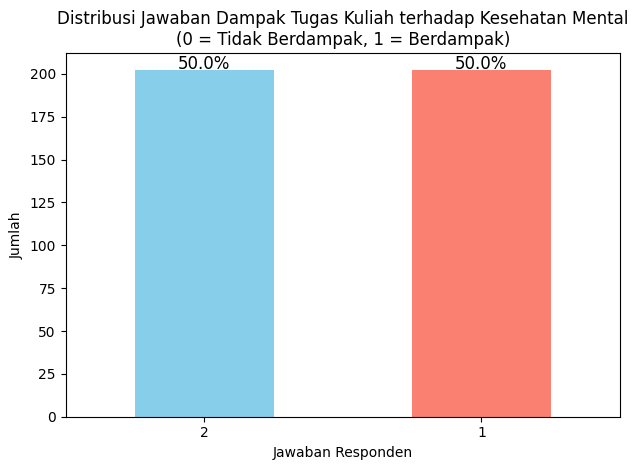

In [ ]:
# Tentukan kolom target secara eksplisit
target_column = 'Apakah tugas kuliah yang diberikan berdampak terhadap kesehatan mental Anda?'

# Hitung jumlah dan persentase tiap kelas
value_counts = df[target_column].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Plot distribusi kelas
ax = value_counts.plot(
    kind='bar',
    title='Distribusi Jawaban Dampak Tugas Kuliah terhadap Kesehatan Mental\n(0 = Tidak Berdampak, 1 = Berdampak)',
    color=['skyblue', 'salmon']
)

# Tambahkan persentase di atas bar
for i, (count, percent) in enumerate(zip(value_counts, percentages)):
    ax.text(i, count + 1, f'{percent:.1f}%', ha='center', fontsize=12)

plt.xlabel('Jawaban Responden')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


INFO:mealpy.swarm_based.PSO.OriginalPSO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 1, Current best: 0.7430288461538461, Global best: 0.7430288461538461, Runtime: 7.97912 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 2, Current best: 0.7430288461538461, Global best: 0.7430288461538461, Runtime: 10.67110 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 3, Current best: 0.7430288461538461, Global best: 0.7430288461538461, Runtime: 13.01340 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 4, Current best: 0.7430288461538461, Global best: 0.7430288461538461, Runtime: 13.95893 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 5, Current best: 0.7430288461538461, Global best: 0.7430288461538461, Runtime: 13.19657 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 6, Current best: 0.7430288461538461, Global best: 0.7430288461

Best Hyperparameters: C=98.23949421266934, gamma=0.32326659658488904, kernel=linear
Best Accuracy (CV): 0.7430

========= Hasil Pengujian pada Data Uji =========
Akurasi: 71.60%

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.61      0.68        41
           2       0.67      0.82      0.74        40

    accuracy                           0.72        81
   macro avg       0.73      0.72      0.71        81
weighted avg       0.73      0.72      0.71        81


Confusion Matrix:
[[25 16]
 [ 7 33]]


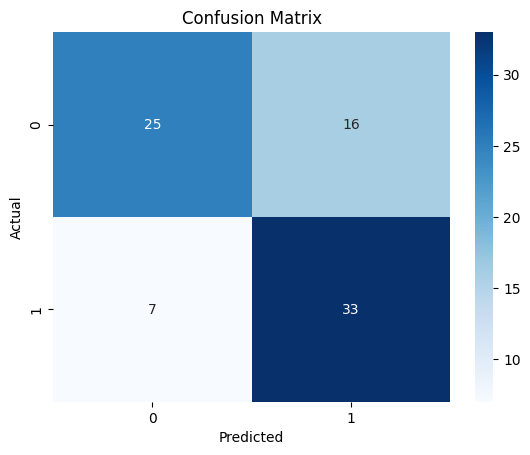

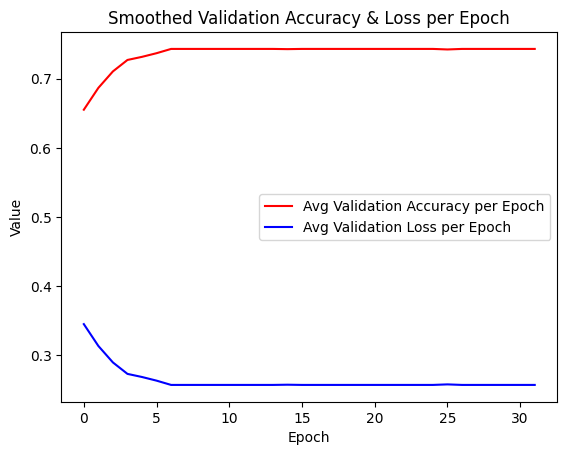

In [ ]:
# 1. Load Dataset
df = pd.read_csv("/content/clean_data_SMOTE_without_outliers.csv")

# 2. Pisahkan fitur dan target
target_column = 'Apakah tugas kuliah yang diberikan berdampak terhadap kesehatan mental Anda?'
X = df.drop(columns=[target_column])
y = df[target_column]

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Daftar kernel dan definisi problem SVM untuk PSO
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

class SVMOptimizedProblem(Problem):
    def __init__(self, bounds=None, minmax="max", data=None, **kwargs):
        self.data = data  # [X_train_scaled, y_train]
        self.validation_accuracy_history = []
        super().__init__(bounds, minmax, **kwargs)

    def obj_func(self, x):
        C = x[0]
        gamma = x[1]
        kernel_index = int(x[2])  # Konversi ke integer

        kernel = kernels[kernel_index]

        X_train_std, y_train = self.data
        model = SVC(C=C, gamma=gamma, kernel=kernel)
        scores = cross_val_score(model, X_train_std, y_train, cv=5)
        val_acc = scores.mean()
        self.validation_accuracy_history.append(val_acc)
        return val_acc

# 6. Set bounds dan inisialisasi problem
bounds = [
    FloatVar(lb=0.1, ub=100, name="C"),
    FloatVar(lb=1e-4, ub=1, name="gamma"),
    IntegerVar(lb=0, ub=len(kernels) - 1, name="kernel_index")
]

data = [X_train_scaled, y_train]
problem = SVMOptimizedProblem(bounds=bounds, minmax="max", data=data)

# 7. Jalankan PSO
model = PSO.OriginalPSO(epoch=30, pop_size=20)
model.solve(problem, mode="single")

best_C = model.g_best.solution[0]
best_gamma = model.g_best.solution[1]
best_kernel_index = int(model.g_best.solution[2])
best_kernel = kernels[best_kernel_index]

print(f"Best Hyperparameters: C={best_C}, gamma={best_gamma}, kernel={best_kernel}")
print(f"Best Accuracy (CV): {model.g_best.target.fitness:.4f}")

# 8. Latih model SVM terbaik
best_svm = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel)
best_svm.fit(X_train_scaled, y_train)
y_pred = best_svm.predict(X_test_scaled)

print("\n========= Hasil Pengujian pada Data Uji =========")
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 9. Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 10. Grafik Akurasi & Loss per Epoch (Rata-rata)
validation_accuracy_history = problem.validation_accuracy_history
validation_loss_history = [1 - acc for acc in validation_accuracy_history]

iterations_per_epoch = len(validation_accuracy_history) // model.epoch

def average_per_epoch(loss_list, iter_per_epoch):
    return [np.mean(loss_list[i:i+iter_per_epoch])
            for i in range(0, len(loss_list), iter_per_epoch)]

avg_val_loss = average_per_epoch(validation_loss_history, iterations_per_epoch)
avg_val_acc = average_per_epoch(validation_accuracy_history, iterations_per_epoch)

fig, ax = plt.subplots()
ax.plot(avg_val_acc, label='Avg Validation Accuracy per Epoch', color='red')
ax.plot(avg_val_loss, label='Avg Validation Loss per Epoch', color='blue')
ax.set_title('Smoothed Validation Accuracy & Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Value')
ax.legend()
ax.grid(False)
plt.show()

# 11. Simpan grafik dari PSO
output_path = "./pso_charts_svm/"
os.makedirs(output_path, exist_ok=True)
model.history.save_global_objectives_chart(filename=output_path + "goc.png")
model.history.save_local_objectives_chart(filename=output_path + "loc.png")
model.history.save_global_best_fitness_chart(filename=output_path + "gbfc.png")
model.history.save_local_best_fitness_chart(filename=output_path + "lbfc.png")
model.history.save_runtime_chart(filename=output_path + "rtc.png")
model.history.save_exploration_exploitation_chart(filename=output_path + "eec.png")
model.history.save_diversity_chart(filename=output_path + "diversity.png")